# About the Dataset:
The Breast Cancer Diagnostic data is available on the UCI Machine Learning Repository. This database is also available through the UW CS ftp server.

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

Attribute Information:

ID number
Diagnosis (M = malignant, B = benign) 3-32)
Ten real-valued features are computed for each cell nucleus:

radius (mean of distances from center to points on the perimeter)
texture (standard deviation of gray-scale values)
perimeter
area
smoothness (local variation in radius lengths)
compactness (perimeter^2 / area - 1.0)
concavity (severity of concave portions of the contour)
concave points (number of concave portions of the contour)
symmetry
fractal dimension ("coastline approximation" - 1)
The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

# Loading Libraries and Data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # to the check the error and accuracy
import matplotlib as mpl

# LOADING THE DATA SET USING READ_CSV

In [5]:
df = pd.read_csv('data.csv')



# BASIC PREPROCESSING OF THE DATA

In [6]:
df.shape#569 rows and 33 columns


(569, 33)

In [7]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [8]:
df.drop('Unnamed: 32',axis = 1,inplace = True)


In [9]:
X = df.iloc[:,:]
y = df.iloc[:,1]


In [10]:
X = X.drop(['diagnosis','id'],axis = 1)


In [11]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 non-null float64
symmetry_se                569 

## VISUALIZATION

In [12]:
# VISUALIZATION
mpl.style.use(['ggplot']) 
# for ggplot-like style


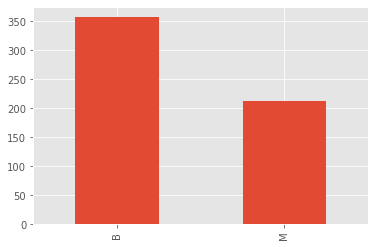

In [13]:
y.value_counts().plot(kind ="bar")


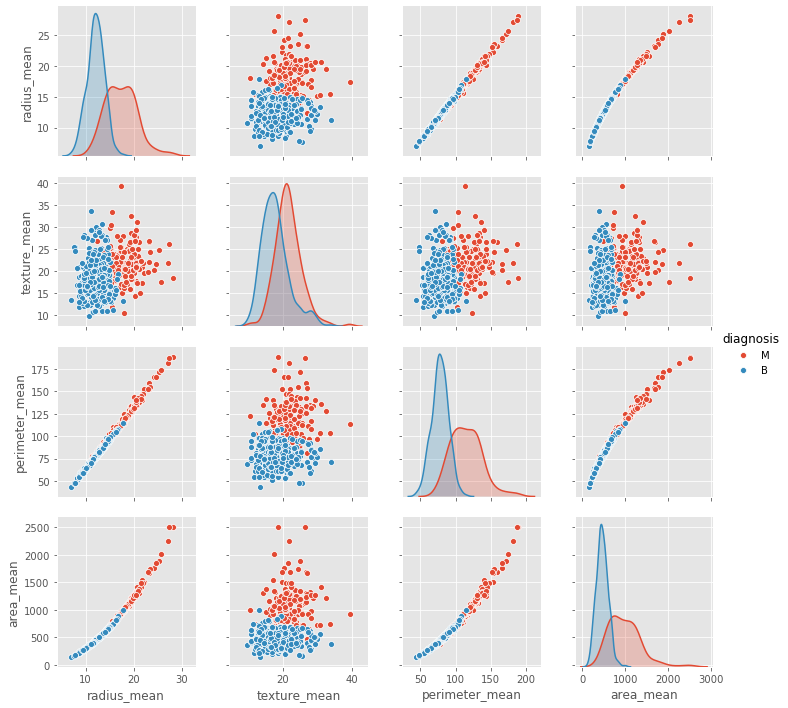

In [14]:
sns.pairplot(df.loc[:,'diagnosis':'area_mean'], hue="diagnosis");


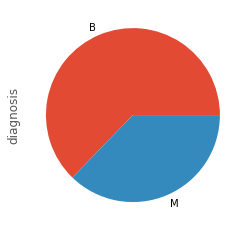

In [15]:
y.value_counts().plot(kind ="pie")


In [16]:
new_data_B= df[df.diagnosis !='M']
new_data_M= df[df.diagnosis !='B']

### FOLLOWNG GRAPHS SHOW THE DIFFERENCE BETWEEN VARIOUS PARAMTERS OF BENIGN AND MALIGNANT TUMORS


Text(0, 0.5, 'mean concavity for benigm')

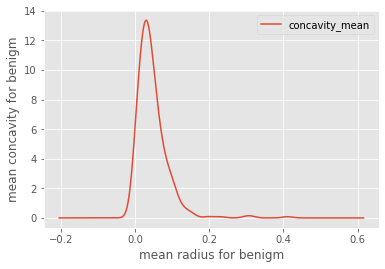

In [17]:
new_data_B.plot(kind = "density",x= 'radius_mean', y = 'concavity_mean')
plt.xlabel("mean radius for benigm")
plt.ylabel("mean concavity for benigm")

Text(0, 0.5, 'mean concavity for malignant')

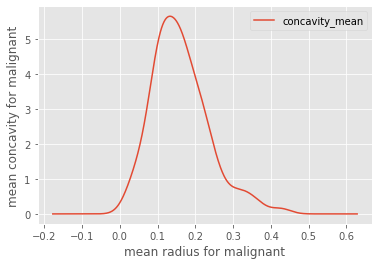

In [18]:
new_data_M.plot(kind = "density",x= 'radius_mean', y = 'concavity_mean')
plt.xlabel("mean radius for malignant")
plt.ylabel("mean concavity for malignant")

# ABOVE TWO GRAPHS PROVE THE DIFFERENCE BETWEEN 2 TUMORS.

Text(0, 0.5, 'mean area for benigm')

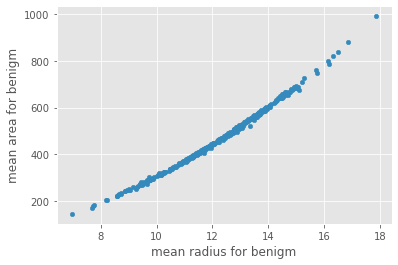

In [19]:
new_data_B.plot(kind = "scatter",x= 'radius_mean', y = 'area_mean')
plt.xlabel("mean radius for benigm")
plt.ylabel("mean area for benigm")


Text(0, 0.5, 'mean area for malignant')

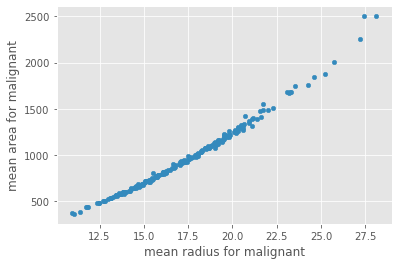

In [20]:
new_data_M.plot(kind = "scatter",x= 'radius_mean', y = 'area_mean')
plt.xlabel("mean radius for malignant")
plt.ylabel("mean area for malignant")


##### SIMILARLY , ABOVE TWO GRAPHS PROVE THAT M TUMORS ARE MUCH BIGGER THAN B TUMORS.

In [21]:
avgB = {}
for i in range(2,new_data_B.shape[1]):
    m = np.mean(new_data_B.iloc[:,i])
    avgB.update({new_data_B.columns[i]:m})

avgB_df = pd.DataFrame(avgB,index = np.arange(1,31))
avgB_df = avgB_df.transpose()
avgB_df = avgB_df.iloc[:,:1]


In [22]:
avgM = {}
for i in range(2,new_data_M.shape[1]):
    m = np.mean(new_data_M.iloc[:,i])
    avgM.update({new_data_M.columns[i]:m})

avgM_df = pd.DataFrame(avgM,index = np.arange(1,31))
avgM_df = avgM_df.transpose()
avgM_df = avgM_df.iloc[:,:1]



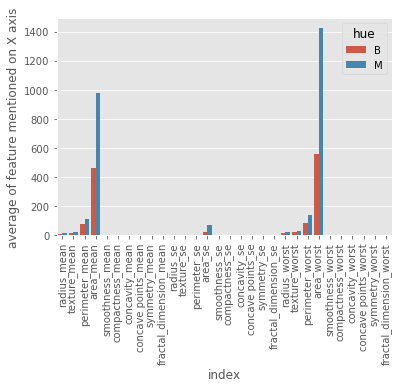

In [23]:
#so now, i have 2 data frames and i want to have a combined barplot

avgB_df['hue']='B'
avgM_df['hue']='M'
res=pd.concat([avgB_df,avgM_df])
res = res.reset_index(level =0)
sns.barplot(x = res.iloc[:,0],y = res.iloc[:,1],data=res,hue='hue')
plt.xticks(rotation=90)
plt.ylabel('average of feature mentioned on X axis')
plt.show()

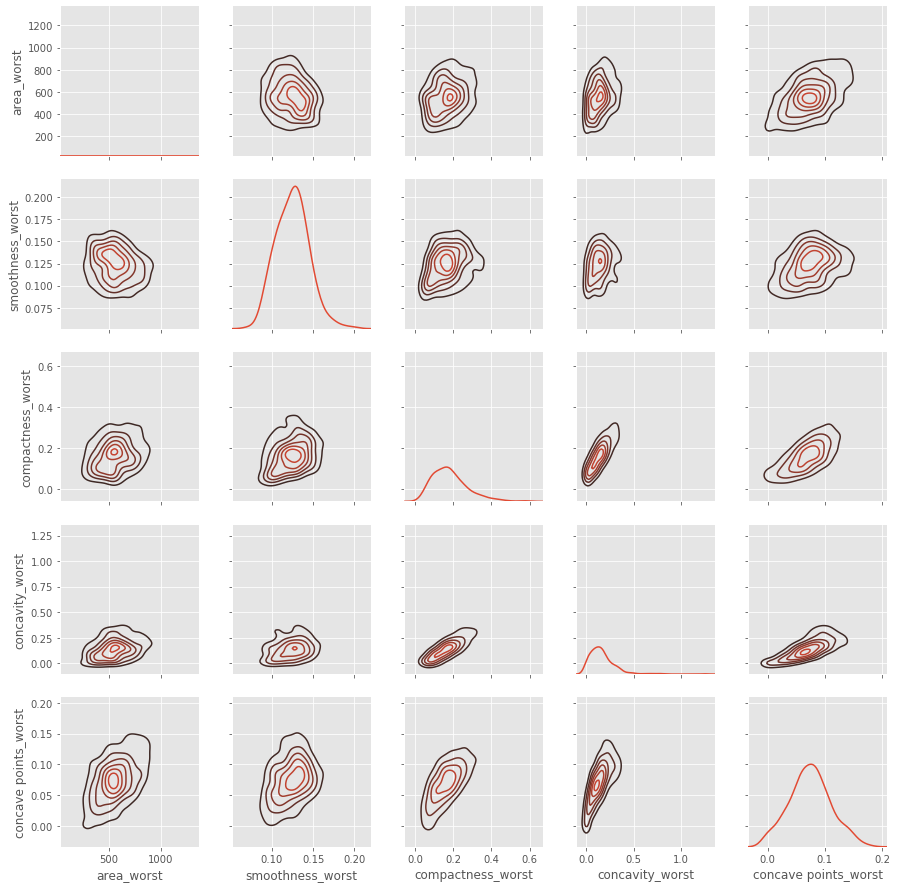

In [24]:
g = sns.PairGrid(new_data_B.loc[:,'area_worst':'concave points_worst'])
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);


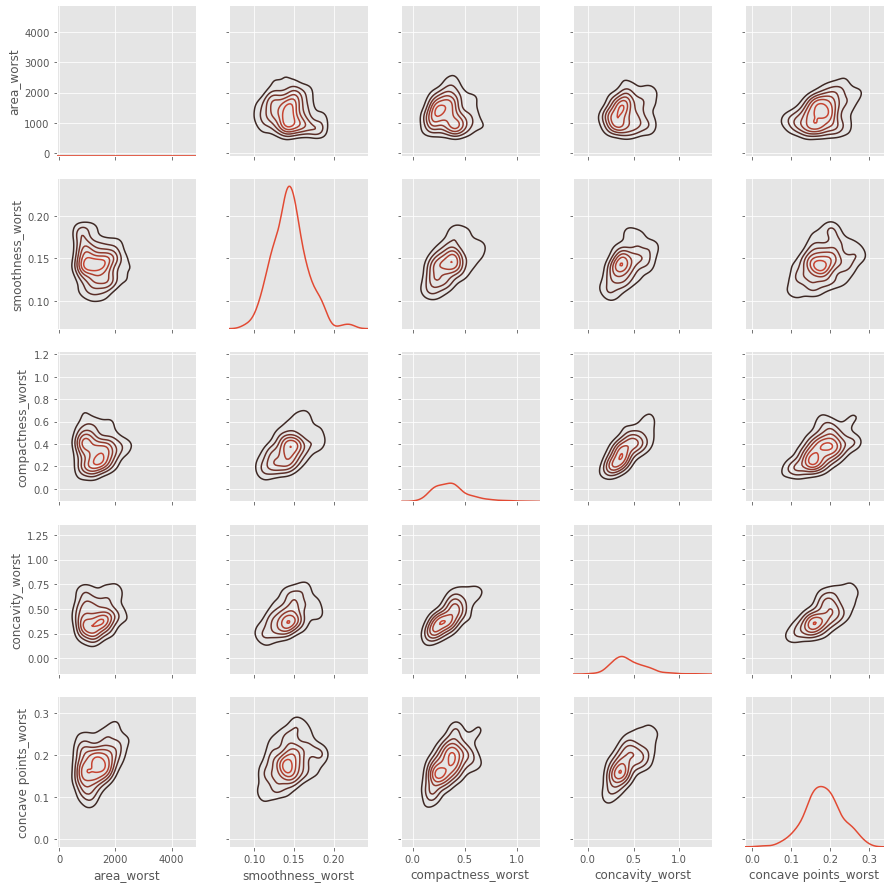

In [25]:

g = sns.PairGrid(new_data_M.loc[:,'area_worst':'concave points_worst'])
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);


**ANALYZING THE GRAPHS ABOVE, GIVE US A GOOD PICTORIAL IDEA FOR DIFFERENCES BETWEEN THE TUMORS**

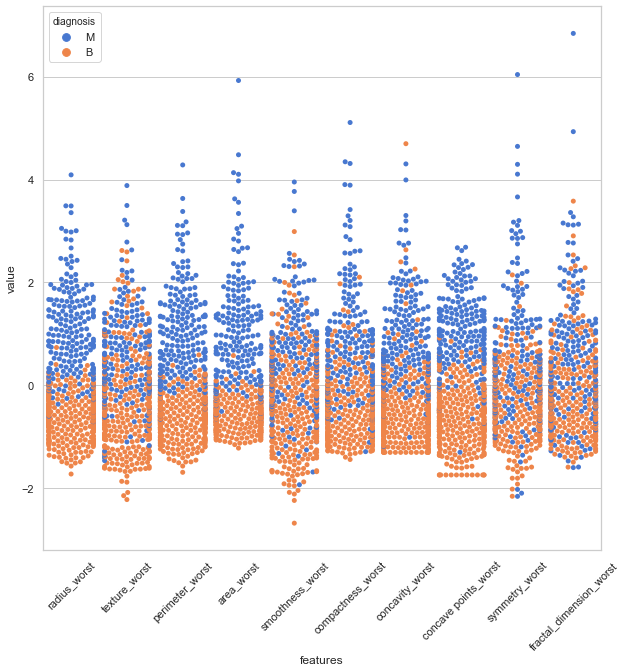

In [26]:
sns.set(style="whitegrid", palette="muted")

data = pd.DataFrame(X)
data_n_2 = (data - data.mean()) / (data.std())  
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=45);

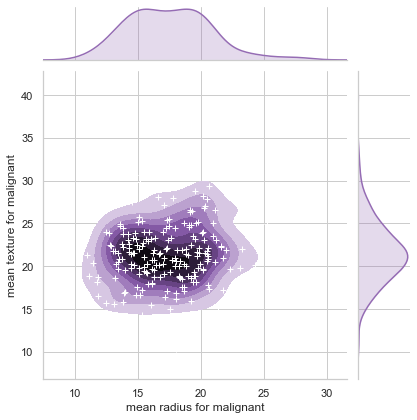

In [27]:
g = sns.jointplot(x=new_data_M['radius_mean'], y=new_data_M['texture_mean'], data=new_data_M, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("mean radius for malignant", "mean texture for malignant");



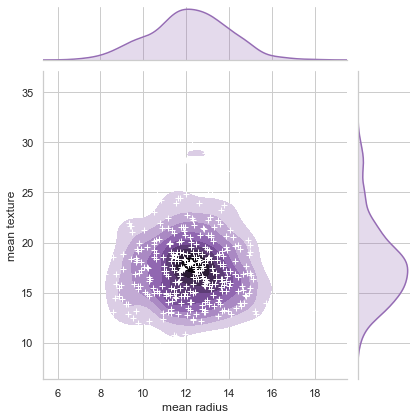

In [28]:
g = sns.jointplot(x=new_data_B['radius_mean'], y=new_data_B['texture_mean'], data=new_data_B, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("mean radius", "mean texture");



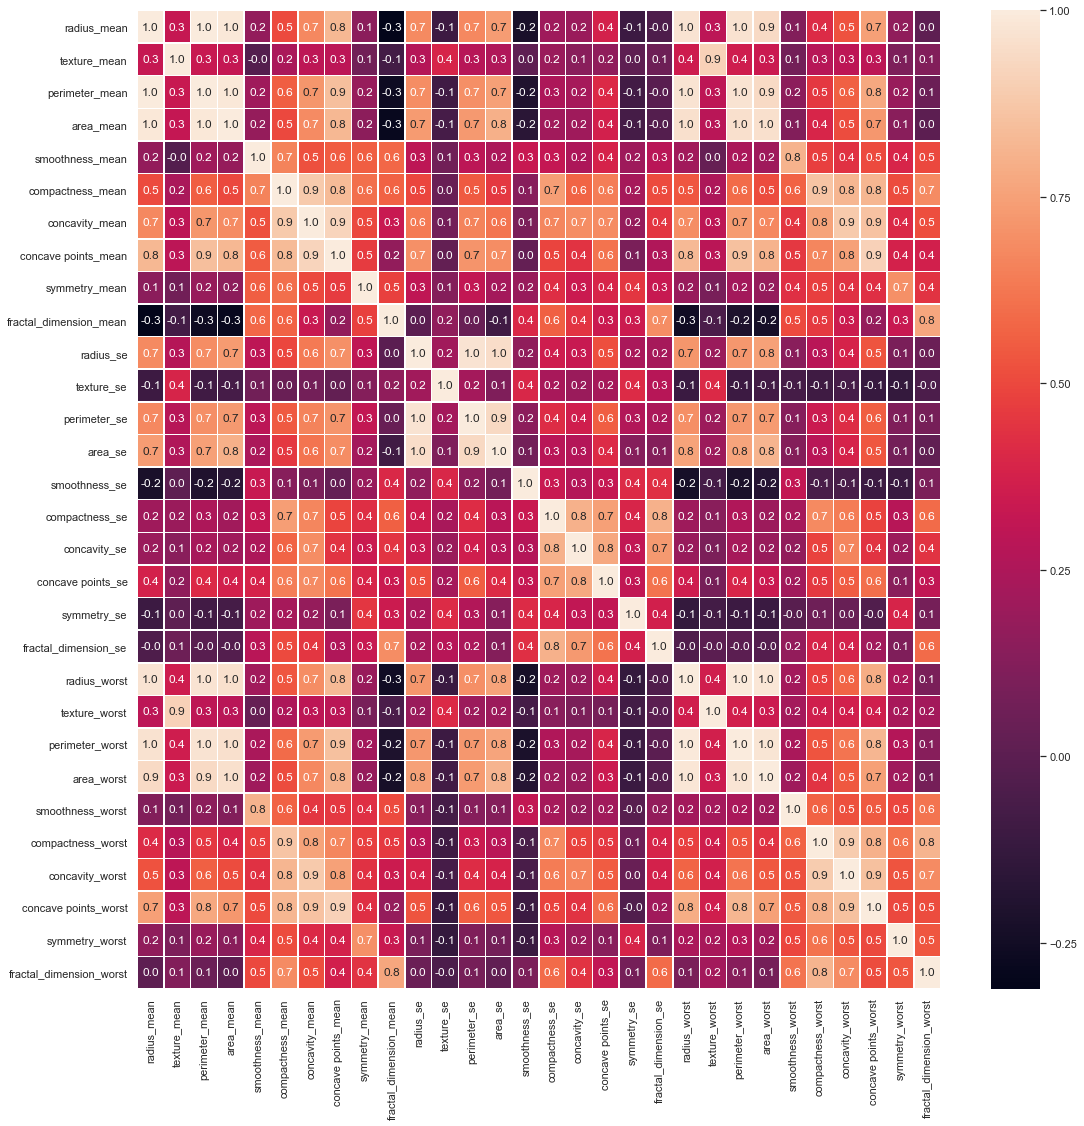

In [29]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

In [30]:
#lets see the amount of benigan and melignant tissues:
#lets use countplot for this.
B,M = y.value_counts()

print(B,M)
#we can see that there are 357 B type and 212 M type cells


357 212


### #lets split the data now


In [31]:
#lets split the data now
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.2,random_state = 1)


# FITTING & TESTING THE CLASSIFICATION MODELS (without scaling the data)::

In [32]:
model=RandomForestClassifier(n_estimators=100)
model.fit(xtrain,ytrain)# now fit our model for traiing data
prediction=model.predict(xtest)# predict for the test data
print(metrics.accuracy_score(prediction,ytest))



0.956140350877193


In [33]:
    
model = svm.SVC()
model.fit(xtrain,ytrain)# now fit our model for traiing data
prediction=model.predict(xtest)# predict for the test data

metrics.accuracy_score(prediction,ytest)
print(metrics.accuracy_score(prediction,ytest))
metrics.confusion_matrix(ytest,prediction)


0.631578947368421


C:\Users\Kritsid\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([[72,  0],
       [42,  0]], dtype=int64)

In [34]:

#knn
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
print(metrics.accuracy_score(ypred,ytest))
metrics.confusion_matrix(ytest,prediction)




0.9385964912280702


array([[72,  0],
       [42,  0]], dtype=int64)

In [35]:

#naive bayes
knn = GaussianNB()
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
print(metrics.accuracy_score(ypred,ytest))
metrics.confusion_matrix(ytest,prediction)


0.9473684210526315


array([[72,  0],
       [42,  0]], dtype=int64)

In [36]:

#decision tree

dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
print(metrics.accuracy_score(ypred,ytest))
metrics.confusion_matrix(ytest,prediction)


0.9385964912280702


array([[72,  0],
       [42,  0]], dtype=int64)

## comparing accuracy of unscaled data all together

In [37]:
#decision tree

dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
print('DECISION TREE CLASSIFIER:: ',metrics.accuracy_score(ypred,ytest))

#random forest
model=RandomForestClassifier(n_estimators=100)
model.fit(xtrain,ytrain)# now fit our model for traiing data
prediction=model.predict(xtest)# predict for the test data
print('FORSEST TREE CLASSIFICATION:: ',metrics.accuracy_score(prediction,ytest))


#SVM
model = svm.SVC()
model.fit(xtrain,ytrain)# now fit our model for traiing data
prediction=model.predict(xtest)# predict for the test data
metrics.accuracy_score(prediction,ytest)
print('SUPPORT VECTOR MACHINE:: ',metrics.accuracy_score(prediction,ytest))

#knn
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
print('K NEAREST NEIGHBOURS:: ',metrics.accuracy_score(ypred,ytest))


#naive bayes
NB = GaussianNB()
NB.fit(xtrain,ytrain)
ypred = NB.predict(xtest)
print('NAIVE BAYES ALGORITHM:: ',metrics.accuracy_score(ypred,ytest))





DECISION TREE CLASSIFIER::  0.956140350877193
FORSEST TREE CLASSIFICATION::  0.956140350877193
SUPPORT VECTOR MACHINE::  0.631578947368421
K NEAREST NEIGHBOURS::  0.9385964912280702
NAIVE BAYES ALGORITHM::  0.9473684210526315


C:\Users\Kritsid\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# WE CAN SEE THAT RANDOM FOREST CLASSIFIER GIVES US THE BEST ACCURACY RESULTS.



# THIS THE THE BEST ALGORITHM FOR THIS DATA SET!!!!!!!!!!



# AND


# SVM BEING THE WORST FOR THIS DATA

# BUT!!!!!!!


# LETS US NOT HURRY MUCH

# NOW, LETS SCALE THE DATA

In [38]:
#what if i scale the data now::

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [40]:
#lets split the data now
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.2,random_state = 1)

#decision tree
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
print('DECISION TREE CLASSIFIER:: ',metrics.accuracy_score(ypred,ytest))

#random forest
model=RandomForestClassifier(n_estimators=100)
model.fit(xtrain,ytrain)# now fit our model for traiing data
prediction=model.predict(xtest)# predict for the test data
print('FORSEST TREE CLASSIFICATION:: ',metrics.accuracy_score(prediction,ytest))


#SVM
model = svm.SVC()
model.fit(xtrain,ytrain)# now fit our model for traiing data
prediction=model.predict(xtest)# predict for the test data
metrics.accuracy_score(prediction,ytest)
print('SUPPORT VECTOR MACHINE:: ',metrics.accuracy_score(prediction,ytest))

#knn
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
print('K NEAREST NEIGHBOURS:: ',metrics.accuracy_score(ypred,ytest))


#naive bayes
NB = GaussianNB()
NB.fit(xtrain,ytrain)
ypred = NB.predict(xtest)
print('NAIVE BAYES ALGORITHM:: ',metrics.accuracy_score(ypred,ytest))





DECISION TREE CLASSIFIER::  0.9385964912280702
FORSEST TREE CLASSIFICATION::  0.9473684210526315
SUPPORT VECTOR MACHINE::  0.9736842105263158
K NEAREST NEIGHBOURS::  0.956140350877193
NAIVE BAYES ALGORITHM::  0.9473684210526315


C:\Users\Kritsid\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# AFTER SCALING, SVM PERFORMS THE BEST